In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing


In [ ]:
import os
import numpy as np
import pandas as pd
import cv2 as cv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import random
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
path_dir = "/content/drive/MyDrive/DATASETS/Training"

In [ ]:
Categories = ["glioma","meningioma","notumor","pituitary"]

In [ ]:
data = []
def create_data():
    for categories in Categories:
        path = os.path.join(path_dir , categories)
        class_name = categories
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path,img))
                new_array = cv.resize(img_array , (100,100))
                data.append([new_array , class_name])
            except Exception as e:
                pass
create_data()

In [ ]:
random.shuffle(data)

In [ ]:
x_data = []
y_data = []
for features,labels in data:
    x_data.append(features)
    y_data.append(labels)

In [ ]:
df = pd.DataFrame(y_data,columns=["labels"])

In [ ]:
df.head(10)

,labels
0,pituitary
1,meningioma
2,pituitary
3,notumor
4,meningioma
5,glioma
6,meningioma
7,glioma
8,glioma
9,pituitary


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5722 entries, 0 to 5721
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  5722 non-null   object
dtypes: object(1)
memory usage: 44.8+ KB


In [ ]:
df.describe()

,labels
count,5722
unique,4
top,notumor
freq,1605


In [ ]:
x_data = np.array(x_data)


In [ ]:
le = LabelEncoder()
y_data = le.fit_transform(y_data)

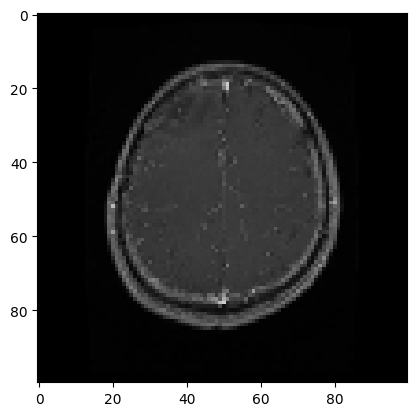

In [ ]:
plt.imshow(x_data[301])

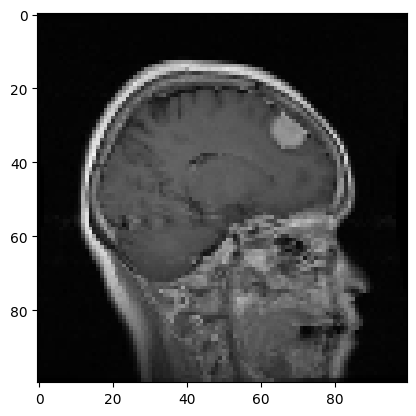

In [ ]:
plt.imshow(x_data[608])

In [ ]:
test_data = []
def create_data():
    for categories in Categories:
        path = os.path.join("/content/drive/MyDrive/DATASETS/Testing" , categories)
        class_name = categories
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path,img))
                new_array = cv.resize(img_array , (100,100))
                test_data.append([new_array , class_name])
            except Exception as e:
                pass
create_data()

In [ ]:
test_data[0]

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 'glioma']

In [ ]:
random.shuffle(test_data)

In [ ]:
x_test = []
y_test = []
for features,labels in test_data:
    x_test.append(features)
    y_test.append(labels)

In [ ]:
x_test = np.array(x_test)

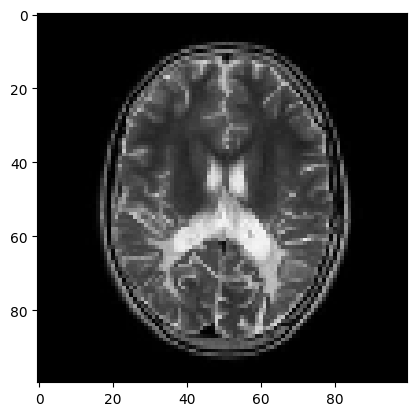

In [ ]:
plt.imshow(x_test[3])

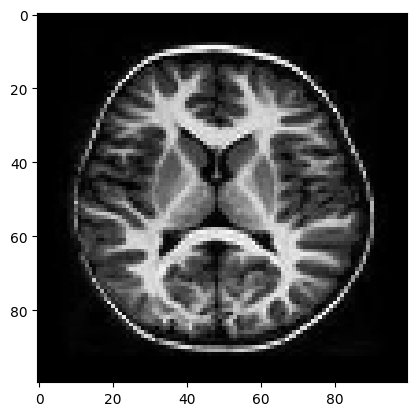

In [ ]:
plt.imshow(x_test[100])

In [ ]:
le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [ ]:
x_data.shape

(5722, 100, 100, 3)

In [ ]:
x_test.shape

(1311, 100, 100, 3)

In [ ]:
model = Sequential()
resnet = tf.keras.applications.resnet50.ResNet50(include_top=False,
                                       weights=None,
                                       input_shape=(100,100,3),
                                       classes=4)
model.add(resnet)
model.add(Flatten())
model.add(Dense(122,activation="relu"))
model.add(Dense(4,activation="softmax"))

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
history = model.fit(x_data, y_data,validation_data=(x_test,y_test),epochs=10, batch_size=100)

Epoch 1/10
58/58 [==============================] - 1229s 21s/step - loss: 2.9610 - accuracy: 0.4224 - val_loss: 580578.6250 - val_accuracy: 0.3089
Epoch 2/10
58/58 [==============================] - 1163s 20s/step - loss: 0.8179 - accuracy: 0.7003 - val_loss: 4049.3433 - val_accuracy: 0.3753
Epoch 3/10
58/58 [==============================] - 1192s 21s/step - loss: 0.4854 - accuracy: 0.8272 - val_loss: 1.1750 - val_accuracy: 0.4790
Epoch 4/10
58/58 [==============================] - 1193s 21s/step - loss: 0.3026 - accuracy: 0.8894 - val_loss: 0.7390 - val_accuracy: 0.6918
Epoch 5/10
58/58 [==============================] - 1194s 21s/step - loss: 0.1801 - accuracy: 0.9383 - val_loss: 0.3558 - val_accuracy: 0.8558
Epoch 6/10
58/58 [==============================] - 1195s 21s/step - loss: 0.1505 - accuracy: 0.9476 - val_loss: 0.4723 - val_accuracy: 0.8047
Epoch 7/10
58/58 [==============================] - 1194s 21s/step - loss: 0.1118 - accuracy: 0.9614 - val_loss: 0.2902 - val_accuracy

TypeError: ignored

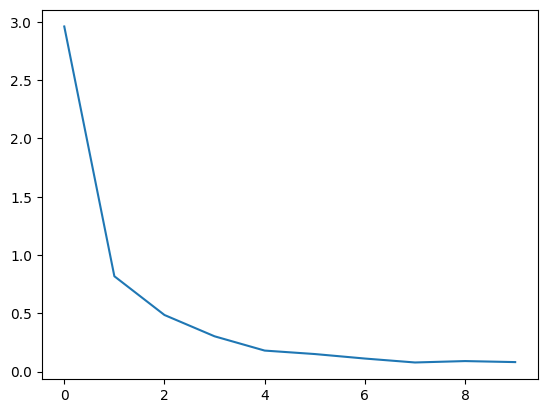

In [ ]:
-plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train","val"])

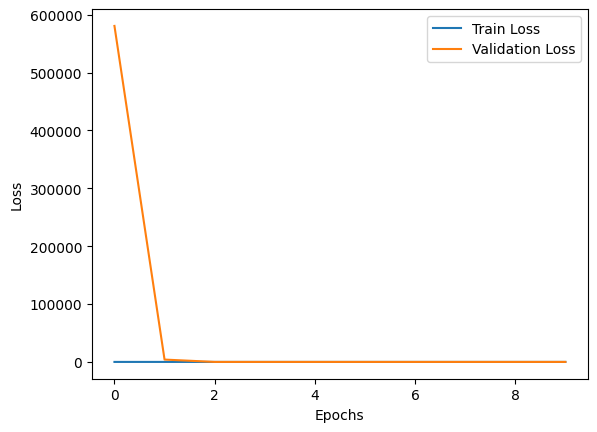

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train Loss", "Validation Loss"])
plt.show()


In [ ]:
y_pred = model.predict(x_test)

41/41 [==============================] - 75s 2s/step


In [ ]:
confusion_matrix(y_pred.argmax(axis=1),y_test)

array([[224,   5,   0,   0],
       [ 69, 266,   3,  12],
       [  2,  29, 402,   2],
       [  5,   6,   0, 286]])

In [ ]:
accuracy_score(y_pred.argmax(axis=1),y_test)

0.8985507246376812

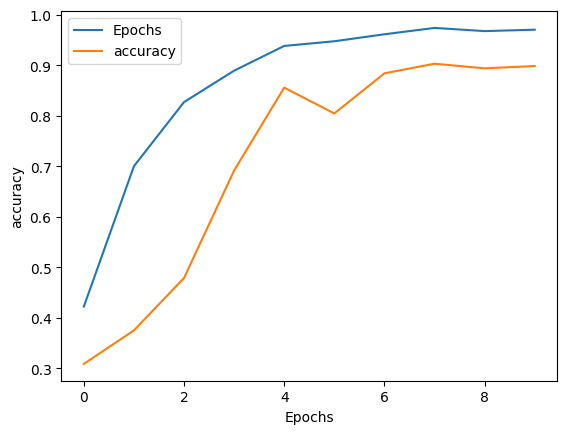

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend(["Epochs", "accuracy"])
plt.show()